## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Load Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length' , 'seoal-width' , 'petal-length', 'petal-width', 'class'] 
dataset = pd.read_csv(url, names= names) 

## Data Exploration

In [4]:
print(dataset.shape)

(150, 5)


In [5]:
print(dataset.head(30))

    sepal-length  seoal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [6]:
print(dataset.describe())

       sepal-length  seoal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
print(dataset.groupby("class").size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Data Visualization

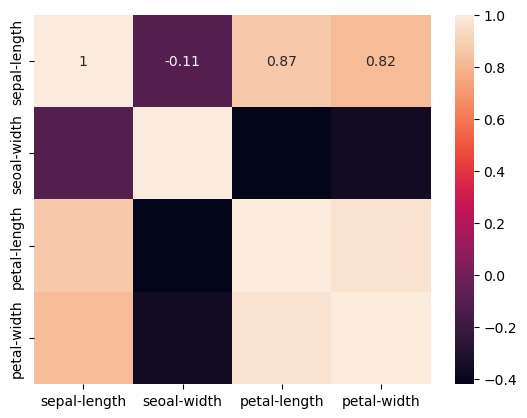

In [14]:
# Calculate the correlation matrix excluding the 'class' column
corr_matrix = dataset.drop(columns=['class']).corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()



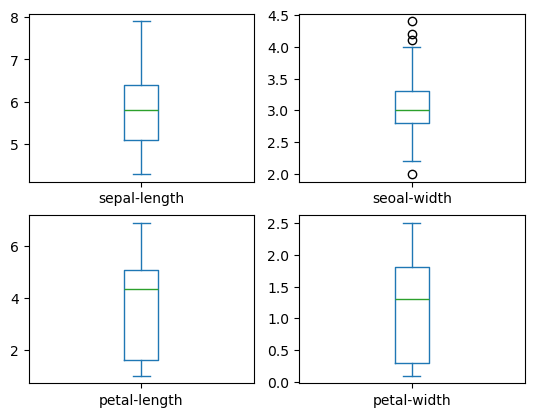

In [8]:
dataset.plot(kind='box', subplots = True, layout = (2,2), sharex = False ,sharey = False)
plt.show()

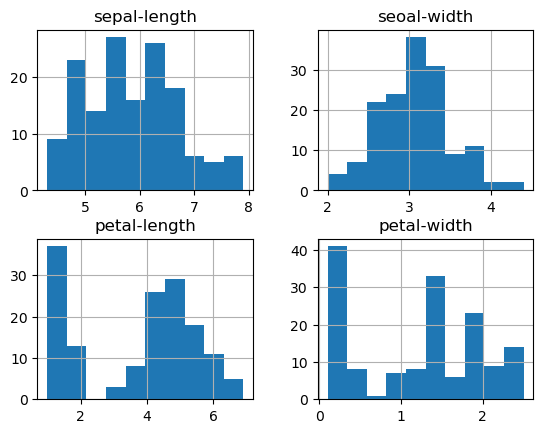

In [9]:
dataset.hist()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

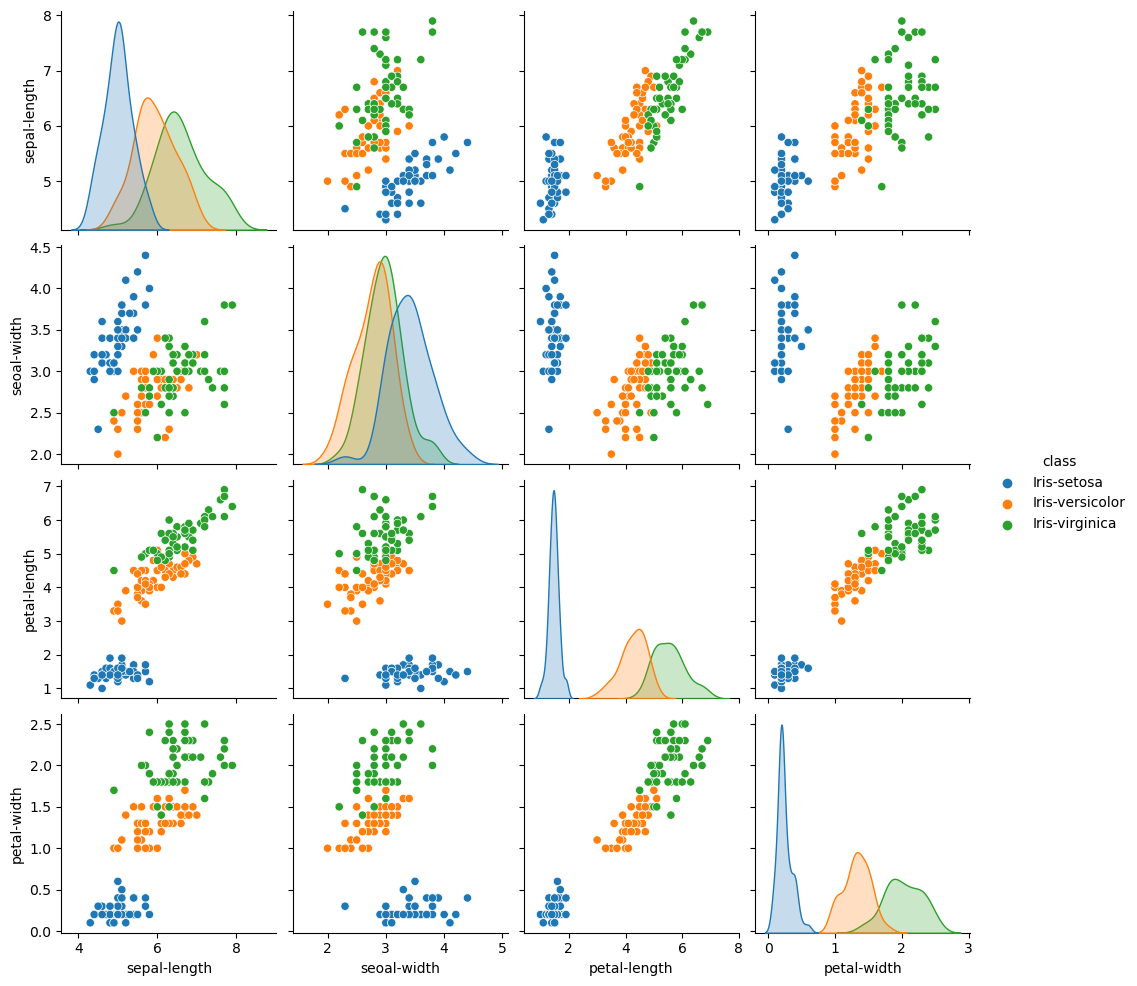

In [12]:
sns.pairplot(dataset, hue='class')
plt.show()

## Corelation Matrix

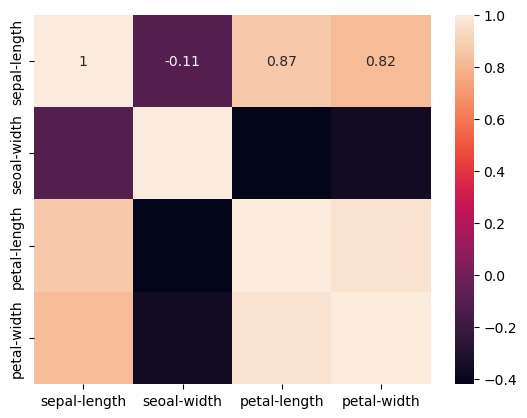

In [23]:

corr_matrix = dataset.drop(columns=['class']).corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()



## Data preparation

In [24]:
array = dataset.values
X = array[:,0:4] 
Y = array[:,4]
validation_size = 0.20 
seed = 6 




## Train-Test split

In [25]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)
seed = 6 
scoring = 'accuracy' 


## Model Comparison

In [28]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.2f} ({cv_results.std():.2f})")



LR: 0.98 (0.03)
LDA: 0.97 (0.04)
KNN: 0.98 (0.03)
CART: 0.96 (0.08)
NB: 0.97 (0.04)
SVM: 0.98 (0.03)
